In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [ ]:
df.shape

(423857, 25)

In [ ]:
objcol= df.select_dtypes(['object']).columns
objcol

Index(['url', 'region', 'region_url', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission', 'vin', 'drive',
       'size', 'type', 'paint_color', 'image_url', 'description', 'state'],
      dtype='object')

In [ ]:
# Check any number of columns with NaN
print(df.isnull().any().sum(), ' / ', len(df.columns))
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

19  /  25
423857  /  423857


In [ ]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.238570e+05,4.238570e+05,328743.000000,2.705850e+05,0.0,324404.000000,324404.000000
mean,7.190602e+09,5.779437e+04,2009.827358,9.942578e+04,NaN,38.731429,-93.949367
std,5.159269e+06,1.002581e+07,10.135809,1.204833e+05,NaN,5.902977,17.930566
min,7.178302e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-80.386400,-161.394000
25%,7.186688e+09,4.499000e+03,2007.000000,4.432400e+04,NaN,35.054500,-106.678000
50%,7.192068e+09,9.995000e+03,2012.000000,9.174900e+04,NaN,39.366900,-88.009900
75%,7.194909e+09,1.899500e+04,2016.000000,1.372370e+05,NaN,42.517075,-80.832500
max,7.197006e+09,3.808256e+09,2021.000000,1.000000e+07,NaN,80.383400,115.524000


In [ ]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [ ]:
df=df.drop(['id', 'url', 'region_url', 'image_url', 'county', 'vin', 'region', 'description', 'lat', 'long'], axis=1)
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn


In [ ]:
df.shape

(423857, 15)

In [ ]:
# Check any number of columns with NaN
print(df.isnull().any().sum(), ' / ', len(df.columns))
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

13  /  15
361915  /  423857


In [ ]:
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]

In [ ]:
cols_with_missing

['year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [ ]:
obj=df.select_dtypes(['object']).columns
obj

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state'],
      dtype='object')

In [ ]:
df.describe()

,price,year,odometer
count,4.238570e+05,328743.000000,2.705850e+05
mean,5.779437e+04,2009.827358,9.942578e+04
std,1.002581e+07,10.135809,1.204833e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.499000e+03,2007.000000,4.432400e+04
50%,9.995000e+03,2012.000000,9.174900e+04
75%,1.899500e+04,2016.000000,1.372370e+05
max,3.808256e+09,2021.000000,1.000000e+07


In [ ]:
## check for outliers in price column

rr=sorted(df["price"])



In [ ]:
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)


In [ ]:
Q1

price         389.6
year         2002.0
odometer    20292.0
Name: 0.1, dtype: float64

In [ ]:
Q3

price        31500.0
year          2018.0
odometer    179744.0
Name: 0.9, dtype: float64

In [ ]:
df=df[((df.price >= 389.6) & (df.price < 31500.0))]
df.shape

(339073, 15)

In [ ]:
o=sorted(df["odometer"])
o

[23772.0,
 45431.0,
 48932.0,
 49858.0,
 76202.0,
 86942.0,
 88000.0,
 90112.0,
 90821.0,
 92800.0,
 102000.0,
 102462.0,
 103000.0,
 113000.0,
 116711.0,
 128000.0,
 143528.0,
 150959.0,
 167783.0,
 nan,
 108124.0,
 125000.0,
 152415.0,
 159000.0,
 160600.0,
 170259.0,
 170684.0,
 178054.0,
 188406.0,
 196913.0,
 208016.0,
 210865.0,
 223470.0,
 254217.0,
 271000.0,
 309621.0,
 nan,
 nan,
 nan,
 299000.0,
 nan,
 nan,
 8000.0,
 15878.0,
 17182.0,
 36000.0,
 52103.0,
 53300.0,
 62000.0,
 65000.0,
 68559.0,
 82000.0,
 91806.0,
 94448.0,
 100460.0,
 130000.0,
 143700.0,
 156559.0,
 167828.0,
 176000.0,
 204496.0,
 229937.0,
 nan,
 110000.0,
 186200.0,
 208453.0,
 225858.0,
 230500.0,
 242613.0,
 262000.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 85000.0,
 nan,
 196000.0,
 260607.0,
 nan,
 500.0,
 15414.0,
 38000.0,
 50000.0,
 56289.0,
 58764.0,
 63000.0,
 64596.0,
 73000.0,
 76164.0,
 85122.0,
 85556.0,
 87000.0,
 87742.0,
 92000.0,
 104897.0,
 104898.0,
 105000.0,
 105880.0

In [ ]:
df["odometer"].isna().sum()

123158

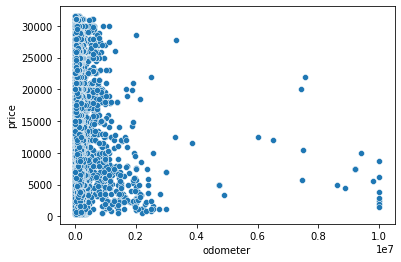

In [ ]:
ax = sns.scatterplot(x="odometer", y="price", data=df)

In [ ]:
df["odometer"].max()

10000000.0

In [ ]:
df.drop(df[df["odometer"]==10000000.0].index,inplace=True)

In [ ]:
df.drop(df[df["odometer"]==0.0].index,inplace=True)

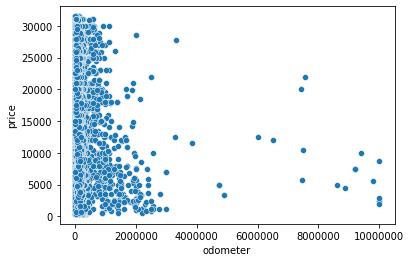

In [ ]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [ ]:
df["odometer"].isna().sum()

123158

In [ ]:
df=df[(df.odometer < 2000000)]

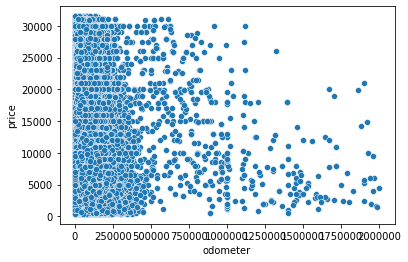

In [ ]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [ ]:
df["odometer"].isna().sum()

0

In [ ]:
df["year"].isna().sum()

556

In [ ]:
df["year"].min()

1919.0

In [ ]:
df=df.dropna(subset=['year'])

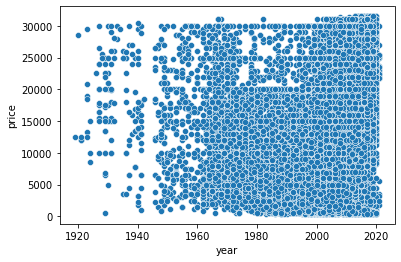

In [ ]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [ ]:
df=df[(df.year > 1950)]

In [ ]:
df["year"].min()

1951.0

In [ ]:
df["year"].isna().sum()

0

In [ ]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,13764400,64.255
condition,8361400,39.033
cylinders,6941300,32.404
paint_color,5158400,24.081
drive,4960800,23.158
type,4074400,19.020
manufacturer,658500,3.074
model,164700,0.769
fuel,150600,0.703
title_status,117100,0.547


In [ ]:
df.condition.value_counts()

excellent    62777
good         50429
like new     11907
fair          4809
new            368
salvage        310
Name: condition, dtype: int64

In [ ]:
## condition is dependent on mileage
## find missing values using odometer readings
## find mean value of odometer reading, group by the condition
## (condition*odometer).mean()

excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [ ]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 82906.89
Excellent average odometer: 110743.99
Good average odometer: 118007.56
Fair average odometer: 180044.46
Salvage average odometer: 155462.32


In [ ]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [ ]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [ ]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,13764400,64.255
cylinders,6941300,32.404
paint_color,5158400,24.081
drive,4960800,23.158
type,4074400,19.020
manufacturer,658500,3.074
model,164700,0.769
fuel,150600,0.703
title_status,117100,0.547
transmission,88800,0.415


In [ ]:
## drop null values with less than 5% NaN

df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

In [ ]:
## size has more than 60% null values, drop Size
df=df.drop(["size"],axis=1)
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,red,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,grey,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,blue,ct
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,truck,white,mn
5,13995,2012.0,ford,f-150,good,6 cylinders,gas,188406.0,clean,automatic,4wd,truck,grey,mn


In [ ]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)


,null,percent
cylinders,6542000,32.200
paint_color,4890300,24.070
drive,4663500,22.954
type,3843500,18.918
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


In [ ]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [ ]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [ ]:
df=df.dropna(subset=['type'])

In [ ]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [ ]:
### EXPLORATORY DATA ANALYSIS

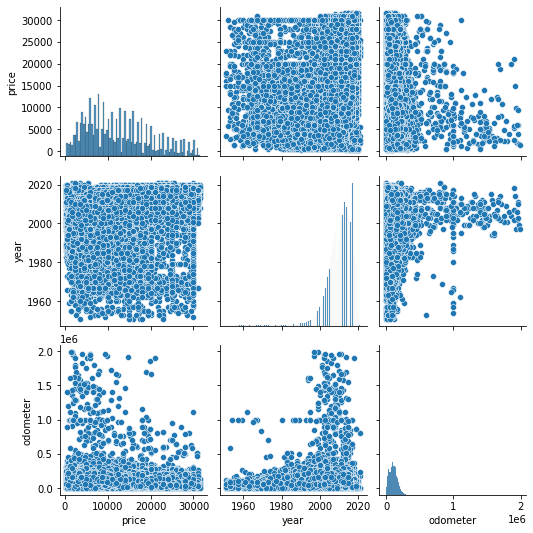

In [ ]:
from scipy import stats
sns.pairplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203166 entries, 4 to 423856
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         203166 non-null  int64  
 1   year          203166 non-null  float64
 2   manufacturer  203166 non-null  object 
 3   model         203166 non-null  object 
 4   condition     203166 non-null  object 
 5   cylinders     203166 non-null  object 
 6   fuel          203166 non-null  object 
 7   odometer      203166 non-null  float64
 8   title_status  203166 non-null  object 
 9   transmission  203166 non-null  object 
 10  drive         203166 non-null  object 
 11  type          203166 non-null  object 
 12  paint_color   203166 non-null  object 
 13  state         203166 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 23.3+ MB


In [ ]:
c=df.columns
for i in c:
    print(df[i].value_counts())

7995     2595
8995     2523
6995     2385
9995     2371
5995     2241
         ... 
22223       1
30539       1
12224       1
10177       1
18441       1
Name: price, Length: 9848, dtype: int64
2017.0    17491
2013.0    15158
2014.0    14567
2015.0    13649
2012.0    13545
          ...  
1961.0       10
1959.0       10
1951.0        8
1954.0        7
1952.0        4
Name: year, Length: 71, dtype: int64
ford               35600
chevrolet          28240
toyota             17338
honda              13862
nissan             12522
jeep                9159
dodge               8035
gmc                 7110
hyundai             6439
subaru              6339
bmw                 5496
ram                 5475
volkswagen          5354
kia                 5135
mercedes-benz       4434
chrysler            4162
buick               3343
mazda               3029
cadillac            2900
lexus               2786
audi                2245
acura               2053
lincoln             1815
infiniti          

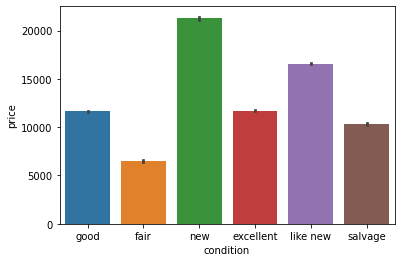

In [ ]:
ax = sns.barplot(x="condition", y="price", data=df)

In [ ]:
### new condition --> higher price 
### price depends directly on condition

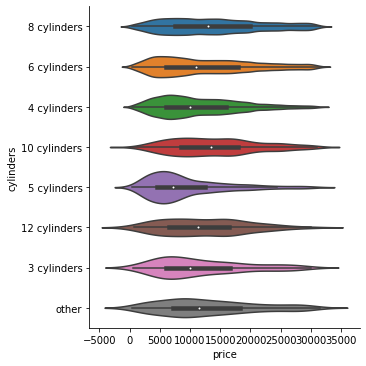

In [ ]:
## plot relation between cylinders and price
sns.catplot(y="cylinders", x="price",kind = "violin", data=df)

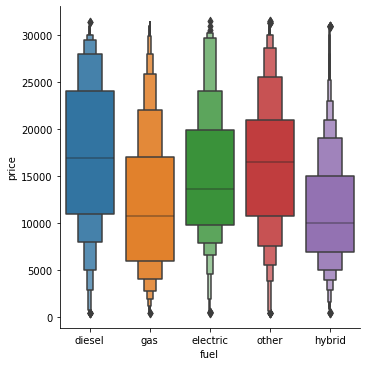

In [ ]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

In [ ]:
## diesel = 11k to 24k
## gas = 5k to 17k
## electric fuel = 10k to 19k
## hybrid = 6k to 15k
## other = 10k to 20k

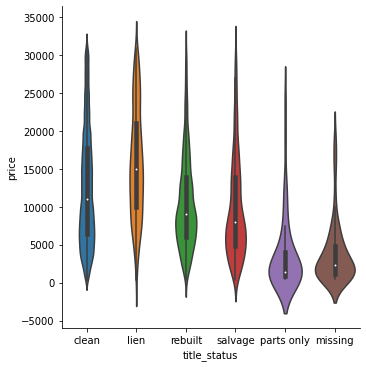

In [ ]:
sns.catplot(x="title_status", y="price",kind="violin", data=df)

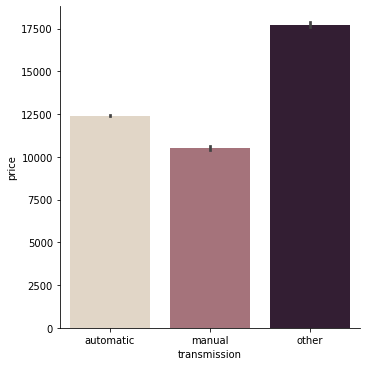

In [ ]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

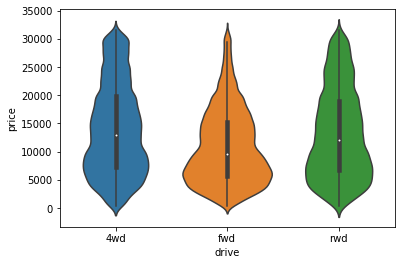

In [ ]:
sns.violinplot(x=df.drive, y=df.price);

In [ ]:
## 4wd and rwd seem similar
## fwd is different

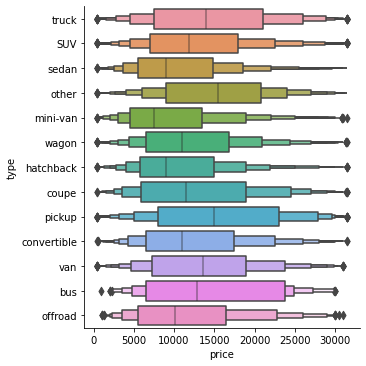

In [ ]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

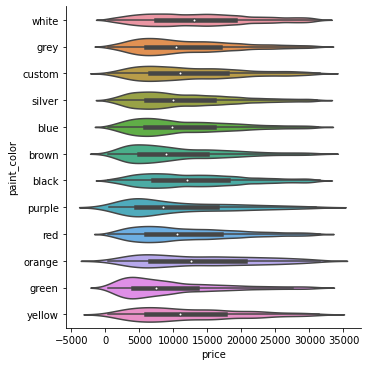

In [ ]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

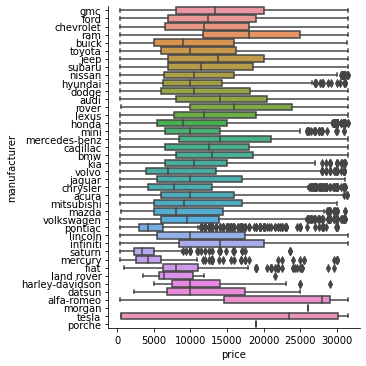

In [ ]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

In [ ]:
## LABEL PROCESSING



In [ ]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [ ]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [ ]:
df[['manufacturer', 'model', 'condition', 'cylinders',
'fuel', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state']] = df[['manufacturer', 'model', 'condition', 'cylinders',
'fuel', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state']].apply(le.fit_transform)

In [ ]:
## SPLIT TRAIN AND TEST DATA

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
y= df.price
x= df.drop('price', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(162532, 13) (162532,)
(40634, 13) (40634,)


In [ ]:
## TRAINING MODEL

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 1829.44
Mean Squared Error: 8853810.45
Root Mean Squared Error: 2975.54
84.46988597055778


The accuracy is 84.47%

In [ ]:
X_test

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
278400,2005.0,18,14304,3,3,2,144000.0,0,1,0,0,2,19
270693,2017.0,29,11751,3,3,2,43162.0,0,0,1,9,1,14
140704,2019.0,6,4196,2,5,2,17675.0,0,0,0,9,9,3
155252,2012.0,11,7047,3,3,2,121300.0,0,0,1,4,0,13
279087,2015.0,14,4020,0,6,2,80842.0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291173,2013.0,14,3387,2,3,2,92374.0,0,0,1,9,1,45
294587,2003.0,24,11385,5,6,2,150000.0,0,0,2,9,10,19
391752,2013.0,11,4854,3,6,0,46000.0,0,0,2,9,1,34
222780,2007.0,11,9579,0,6,2,43579.0,0,0,2,2,0,4


In [ ]:
y_test

278400    10750
270693    13990
140704    20295
155252     8500
279087    16995
          ...  
291173     9795
294587     4995
391752    19995
222780    14999
86822     16401
Name: price, Length: 40634, dtype: int64

In [ ]:
test_data = pd.concat([y_test, X_test], axis=1)
test_data

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
278400,10750,2005.0,18,14304,3,3,2,144000.0,0,1,0,0,2,19
270693,13990,2017.0,29,11751,3,3,2,43162.0,0,0,1,9,1,14
140704,20295,2019.0,6,4196,2,5,2,17675.0,0,0,0,9,9,3
155252,8500,2012.0,11,7047,3,3,2,121300.0,0,0,1,4,0,13
279087,16995,2015.0,14,4020,0,6,2,80842.0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291173,9795,2013.0,14,3387,2,3,2,92374.0,0,0,1,9,1,45
294587,4995,2003.0,24,11385,5,6,2,150000.0,0,0,2,9,10,19
391752,19995,2013.0,11,4854,3,6,0,46000.0,0,0,2,9,1,34
222780,14999,2007.0,11,9579,0,6,2,43579.0,0,0,2,2,0,4


In [ ]:
train_data = pd.concat([y_train, X_train], axis=1)
train_data

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
336298,21590,2018.0,14,4069,2,6,2,25467.0,0,0,0,0,1,27
329567,19695,2016.0,0,9276,2,5,2,107653.0,0,0,1,0,10,44
35199,4495,2009.0,15,12492,3,5,2,46000.0,0,0,2,4,0,9
365483,7200,2012.0,11,5497,0,5,2,124000.0,0,0,0,0,4,34
269005,23000,2015.0,37,13039,0,5,2,53000.0,4,0,0,8,5,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281928,16977,2015.0,37,2989,3,3,2,71159.0,0,0,1,9,0,35
255538,4400,2003.0,34,8304,2,3,2,100755.0,0,0,1,9,3,38
301353,5400,2009.0,11,5497,2,5,2,135000.0,0,0,0,10,9,22
325677,19995,2012.0,18,14304,3,5,2,42236.0,0,0,0,9,8,43


In [ ]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
4,16995,2007.0,12,12048,2,6,0,254217.0,0,0,0,10,10,23
5,13995,2012.0,11,5924,2,5,2,188406.0,0,0,0,10,5,23
6,7995,2010.0,6,5345,2,3,2,108124.0,0,0,0,0,5,23
7,8995,2011.0,6,13746,2,5,2,178054.0,0,0,0,0,10,23
8,10995,2014.0,11,5703,2,5,2,170259.0,0,0,0,0,10,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423852,1600,2006.0,15,12492,1,5,2,159980.0,0,0,1,9,1,23
423853,9000,2003.0,37,11802,0,6,2,160000.0,0,0,0,0,4,23
423854,700,1994.0,11,5924,1,5,2,212000.0,0,1,2,0,4,23
423855,3800,1999.0,22,13543,0,6,2,160000.0,0,0,2,9,4,23


In [ ]:
test_data.to_csv('test_data.csv', index=False)

In [ ]:
! ls

drive  new_data  sample_data  test_data  test_data.csv	train_data


In [ ]:
train_data.to_csv('train_data.csv', index=False)

In [ ]:
! ls

drive	  sample_data  test_data.csv  train_data.csv
new_data  test_data    train_data


In [ ]:
df.to_csv('new_data.csv', index=False)

In [ ]:
! ls

drive	  new_data.csv	test_data      train_data
new_data  sample_data	test_data.csv  train_data.csv
